In [61]:
import pandas as pd
import boto3
import os
import pickle
import lightgbm as lgb
import numpy as np
from matplotlib import pyplot as plt

# 環境設定

In [16]:
BUCKET = "ryusuke-data-competition"
RESULT_PATH = os.path.join(f"s3://{BUCKET}", "results/")

# 分析

## 概要

In [47]:
df = pd.read_csv(os.path.join(RESULT_PATH, "summary.csv"))

In [48]:
df

,experiment_name,cv_score,MEMO,board_score
0,20240205_04,0.505537,20240205_02.pyがベース.categoryなのにint，float型になっていた...,NaN
1,20240205_02,0.505537,EC2で動かせるかのチェック用.精度に関わる機能は20240204_02.pyと同じ,NaN
2,20240205_02,0.677560,EC2で動かせるかのチェック用.精度に関わる機能は20240204_02.pyと同じ,NaN


## 詳細

In [52]:
df = pd.read_csv(os.path.join(RESULT_PATH, "20240205_02", "cv_details.csv"))
df["temp_sum"] = df["LightGBM"] + df["CatBoost"]
df["LightGBM"] = df["LightGBM"] / df["temp_sum"]
df["CatBoost"] = df["CatBoost"] / df["temp_sum"]
df = df.drop(columns="temp_sum")
df

,LightGBM,CatBoost,negative_ratio,cv_score
0,0.858836,0.141164,0.080979,0.663390
1,0.496596,0.503404,0.072623,0.677030
2,0.445667,0.554333,0.075460,0.686357
3,0.487301,0.512699,0.085067,0.685507
4,0.361656,0.638344,0.065319,0.675518


In [53]:
s3 = boto3.resource('s3')
model = pickle.loads(s3.Bucket(BUCKET).Object("results/20240205_02/LightGBM_model.pickle").get()['Body'].read())

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

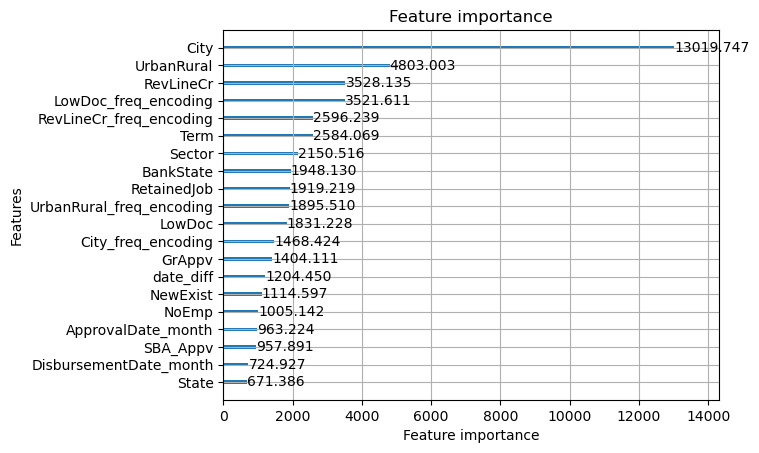

In [56]:
lgb.plot_importance(model, max_num_features=20, importance_type="gain")

In [57]:
s3 = boto3.resource('s3')
model = pickle.loads(s3.Bucket(BUCKET).Object("results/20240205_02/CatBoost_model.pickle").get()['Body'].read())

Text(0.5, 1.0, 'Feature Importance')

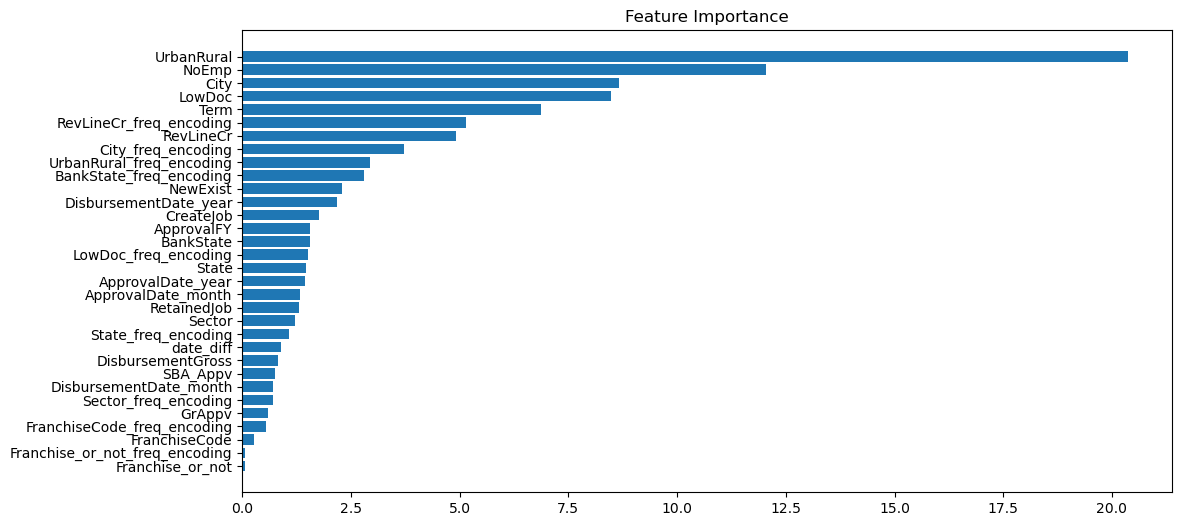

In [62]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(model.feature_names_)[sorted_idx])
plt.title('Feature Importance')